## Import Libraries
In order to generate a bag of words representation we need the following libraries

In [1]:
import numpy as np
import json


## Import Data


In [2]:
# data_set = np.array([ [x['venue'], x['citations']] for x in json.load(open('train-1.json'))[:3] if x['venue']])
data_set = np.array([ [x['venue'], x['citations']] for x in json.load(open('train-1.json')) if x['venue']])
# print(data_set[0])

## Proportion analysis of journals/venues
Aim of the code is to divide the data in n equal portions, where the 'lowest' division accounts for the group of X that contributes the least to a given Y.

In [4]:
def divide_data_in_portions(XY, proportion=4):
    #split data
    XY_split = np.split(XY, 2, 1)
    Y = XY_split[1].astype(np.int16)
    
    summed_Y = np.sum(Y)
    print('There are in total', summed_Y, 'citations in this data')    
    unique_X = np.unique(XY_split[0],return_counts=True)
    print('Found',len(unique_X[0]), 'unique variables')
    # average_contribution = summed_Y / len(unique_X[0])

    a = np.zeros((3,len(unique_X[0])))
    c = [unique_X[0], unique_X[1].astype(int), a[0].astype(int), a[1].astype(int), a[2].astype(float)]
    for x in XY :
        c[2][np.where(c[0] == x[0])[0][0]] += int(x[1])
        # new_count = int(c[2][np.where(c[0] == x[0])[0][0]]) + x[1]
        # c[2][np.where(c[0] == x[0])[0][0]] = new_count
    for (i, j) in enumerate(c[3]):
        c[3][i] = (c[2][i]/c[1][i])
        c[4][i] = 100/summed_Y*c[2][i]
    return c
    

division = divide_data_in_portions(data_set)
sorted_division = np.sort(division[3])

print (division)

There are in total 353556 citations in this data
Found 299 unique variables
[array(['*SEM', '*SEM@NAACL-HLT', '*SEMEVAL', 'ACL', 'ACL 1979',
       'ACL 1984', 'ACL 1996', 'ACL 1999', 'ACL 2000', 'ACL 2002',
       'ACL 2003', 'ACL 2011', 'ACL 2014', 'ACL 2015', 'ACL 2016',
       'ACL 2018', 'ACL 2019', 'ACL 2020',
       'ACL Workshop on Natural Language Processing in the Biomedical Domain',
       'ACL/IJCNLP', 'AKBC@NAACL-HLT', 'ALVR', 'ALW', 'ALW@ACL',
       'AMERICASNLP', 'ANLP', 'ANLP@ACL', 'ANLP@EMNLP', 'AUTOSIMTRANS',
       'ArXiv', 'ArgMining@ACL', 'ArgMining@EMNLP', 'ArgMining@HLT-NAACL',
       'BEA', 'BEA@ACL', 'BEA@EMNLP', 'BEA@NAACL-HLT', 'BIONLP',
       'BLACKBOXNLP', 'BPPF', 'BSNLP@ACL', 'BSNLP@EACL', 'BUCC@ACL',
       'BUCC@ACL/IJCNLP', 'BioNLP', 'BioNLP-OST@EMNLP-IJNCLP',
       'BioNLP@ACL', 'BioNLP@IJCNLP', 'BiomedicalNLP@RANLP',
       'BlackboxNLP@ACL', 'BlackboxNLP@EMNLP', 'CALCS', 'CASE', 'CC-NLG',
       'CIPS-SIGHAN', 'CL', 'CLINICALNLP', 'CLPSYCH', 'CLPs

## Plot the line
In order to make the data more acessible, the data can be plotted

Populating the interactive namespace from numpy and matplotlib
There are in total 353556 citations in this data
Found 299 unique variables
0


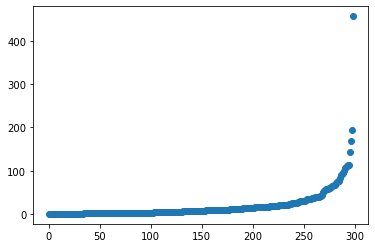

In [7]:
%pylab inline --no-import-all 

division = divide_data_in_portions(data_set)
sorted_division = np.sort(division[3])


plt.scatter(range(len(sorted_division)), sorted_division)